In [27]:
import numpy as np
import pandas as pd

# 주피터 노트북의 출력을 소숫점 3자리까지로 제한 
%precision 3

'%.3f'

In [28]:
df = pd.read_csv('../stat_anlysis/data/ch2_scores_em.csv', 
                 index_col = 'student number') 
df.head()
# csv는 단순 row 파일(단순 데이터파일) -> 이 데이터를 pd라는 객체에 넣어서 df에 저장 -> df의 앞 5행까지 출력 

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [29]:
scores = np.array(df['english'])[:10] #np에서 english 열의 10개의 요소를 가진 scroes 배열을 생성
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [30]:
scores_df = pd.DataFrame({'scores': scores},
                         index = pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                                          name = 'student'))
scores_df

# DataFrame 함수({'열이름' : 넣을 요소}, index = .pd.Index([각 항목], name = '항목이름'))

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [31]:
sum(scores) /len(scores) # 평균 구하기, len은 항목 개수

55.000

In [32]:
np.mean(scores) # np 클래스의 mean 함수: 평균 구하기 기능 

55.000

In [33]:
scores_df.mean() 

scores    55.0
dtype: float64

In [34]:
# 1.1.2 중앙값 - 시험

sorted_scores = np.sort(scores) # np 클래스의 sort 함수: sorting 기능
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [35]:
n = len(sorted_scores)
if n % 2 == 0: # 짝수면 
    m0 = sorted_scores[n//2 - 1] # 파이썬에서 //은 정수 나누기  5번재 요소(4)구하기
    m1 = sorted_scores[n//2] # 6번째 요소(5) 구하기 
    median = (m0+m1) /2 
else: # 홀수면
    median = sorted_scores[(n+1)//2 -1]
median

56.500

In [36]:
# 최빈값 구하기 함수 

pd.Series([1, 1, 1, 2, 2, 3]).mode() 

0    1
dtype: int64

In [37]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [38]:
# 산포도에서 사용하는 지표가 분산, 표준편차(동그라미)
# 산포도로 평균을 내는 것은 부적절하다. 

# 자기자신 - 평균으로 편차 구함 
mean = np.mean(scores) 
deviation = scores - mean 
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [39]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52,59]
another_mean = np.mean(scores)
another_deviation = another_scores - another_mean
another_deviation


# 편차를 비교할 때 편차의 평균이 0이 나올 때도 있다(별표)-(항상 0이지 않나?) 산포도를 구할때는 편차만을 이용하는 건 부적절 

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [40]:
np.mean(deviation) 

0.000

In [41]:
np.mean(another_deviation)

0.000

In [42]:
summary_df = scores_df.copy() # df에 scrores_df를 복사후 다른 항목 추가
summary_df['deviation'] = deviation
summary_df

,scores,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [43]:
# 산포도의 지표로 편차를 사용하는 건 바람직하지만, 편차의 제곱을 아용해서 분산정도를 상쇄시키지 않게 한다. 이렇게 사용하는 것을 분산(별표)라고 한다.

# 제곱해서 음수 즉, 방향성을 상쇄
np.mean(deviation **2)

86.000

In [44]:
np.var(scores) # np의 var 함수: 분산 구하고 편귱을 내줌 

86.000

In [45]:
scores_df.var()

scores    95.555556
dtype: float64

In [46]:
summary_df['square of deviation'] = np.square(deviation)  # square 함수가 제곱을 구현 
summary_df

,scores,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [47]:
summary_df.mean()

scores                 55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [48]:
# 분산에 제곱근을 취한 것이 표준편차(시험) 

a = np.mean(deviation **2)
np.sqrt(a)


9.274

In [49]:
np.sqrt(np.var(scores, ddof=0))

# ddof = 0은 데이터를 전부 사용할 때 사용? 일단 없어도 구현상 큰 문제 없음 

9.274

In [50]:
np.std(scores, ddof=0)

9.274

In [51]:
# 평균을 중심으로 +- 표준편차한 구간을 1시그마 구간이라한다. 표준편차를 2배로 하면 2시그마... 

np.max(scores) - np.min(scores)

np.int64(28)

In [52]:
# 사분위 범위(별표), 27p 그림은 외우기 시험 나옴 빈칸에 글자 쓰기 
# 각 25, 50, 75, 100 구간을 Q1~ Q4구간이라고 함

scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [53]:
pd.Series(scores).describe() # describe 메서드로 지표들을 단순 출력이 가능 

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [54]:
# z 점수(별표- 시험문제)

# 데이터에서 평균을 뺀 후 표준편차로 나눈 값 = z 점수 데이터를 분산정도를 없애고 표준화 시키기 위해서 사용 
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [55]:
# 편찻값 = 졍규화한 값(밑줄)

# 구한 z점수에서 평균이 50, 표준편차가 10인 값으로 변경
z1 = 50 + 10*z
z1

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [56]:
scores_df['deviation value'] = z1 
scores_df

#scores_df에 z 점수 추가 

,scores,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [57]:
english_scores = np.array(df['english']) # 기존까지는 10개요소만 담긴 배열에서 접근했지만 지금부터 전체 요소를 접근 
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [71]:
# 데이터의 분포상태를 세부적으로 알고 싶을 때, 도수분포표를 사용, 각 구간에 몇개의 데이터가 있는가? 같은

freq,_ = np.histogram(english_scores, bins=10, range=(0, 100)) # 영어점수를 0-100까지의 범위에서 10개의 함목으로 나누어서 분포배열을 생성 
freq

# freq뒤에 ,_를 붙임으로서 원래는 빈도 수 배열, 구간 배열 두 배열이 출력되어야하지만 구간 배열을 없앨 수 있었다.  
# 반대로 _, bin_edges로 작성하면 구간배열만 출력가능 
 


array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [72]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)] # 0~10, 90~100까지의 구간을 생성 
freq_dist_df =pd.DataFrame({'frequency':freq},
                           index = pd.Index(freq_class,
                                            name = 'class')) 
# 구간을 왼쪽에 넣고 실제 데이터를 오른쪽에 넣음 

freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [66]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

# 계급의 중앙값을 출력

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [77]:
# 상대도수: 전체 데이터에서 해당 계급의 데이터가 차지하는 비율(밑줄)

# 각 계급의 개수 / 전체 데이터 수 
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [78]:
# 누적 상대도수: 상대도수의 값들을 뒤로갈수록 쌓아가면서 생성 

cm_rel_freq = np.cumsum(rel_freq) 
cm_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [82]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumlative relative frequency'] = cm_rel_freq # freq_dist_df 테이블에 각 배열을 하나씩 추가
freq_dist_df = freq_dist_df[['class value', 'frequency','relative frequency', 'cumlative relative frequency']] # 이 코드는 딱히 필요없지 않나?

freq_dist_df

,class value,frequency,relative frequency,cumlative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [83]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

# 최빈값: 구간 중 가장 값이 많은 구간의 중앙값

np.int64(65)

In [85]:
import matplotlib.pyplot as plt # 그래프를 그리기 위해서 필요
%matplotlib inline # 그래프가 주피터 노트북 위에서 출력하기 위해서 필요

UsageError: unrecognized arguments: # 그래프가 주피터 노트북 위에서 출력하기 위해서 필요


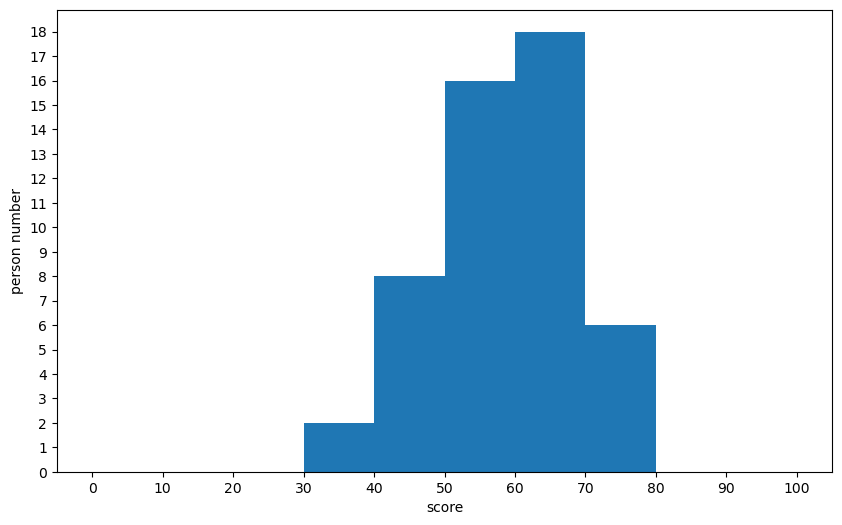

In [92]:
fig = plt.figure(figsize=(10,6)) # 캔버스 10*6크기로 생성 

ax = fig.add_subplot(111) # 캔버스 위에 그리기 위해 지정 

freq,_,_ =  ax.hist(english_scores, bins=10, range=(0, 100)) # 0~100까지 구간 10으로 도수분포배열 생성 
# 도수분포배열만 사용하기 위해서 다른 반환 값들인 구간 배열과 막대 객체 리스트를 무시 이를 위해 freq 옆에 ,_,_를 추가 (막대 객체 리스트가 머지?)

# 각 레이블에 이름 붙이기 
ax.set_xlabel('score')
ax.set_ylabel('person number')

# 각 축에 눈금 생성 
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

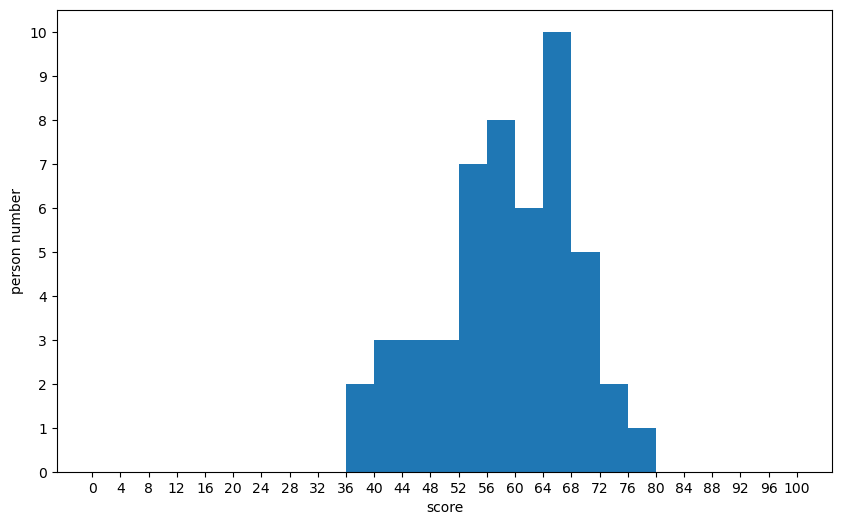

In [93]:
fig = plt.figure(figsize=(10,6)) 

ax = fig.add_subplot(111)

freq, _, _ =  ax.hist(english_scores, bins=25, range=(0, 100)) # 구간을 좀더 촘촘하게 

ax.set_xlabel('score')
ax.set_ylabel('person number')

#그래서 x축 눈금도 보다 촘촘하게 
ax.set_xticks(np.linspace(0, 100,25+1))
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show()

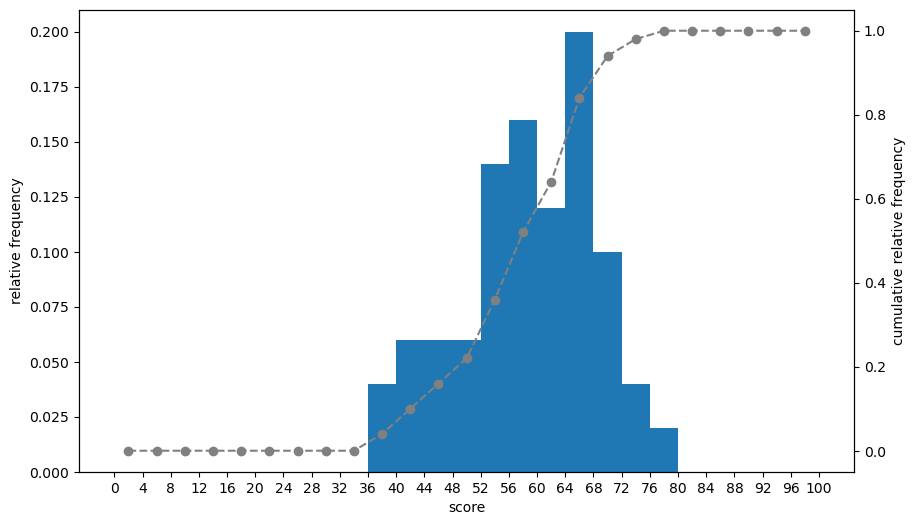

In [100]:
# 46이미지를 만드는 것이 목표 42- 46까지 코드 작성 
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# 다른 y축을 추가하기 위해 사용
ax2 = ax1.twinx()

# 도수를 데이터의 수로 나눈 값, 이 값을 hist의 인수로 추가 
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, 
                          range=(0, 100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 꺽은 선 그래프를 그리기 위해서 사용, 각 중앙값의 마커를 o으로 점선으로 구현
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')

ax2.grid(visible=False) # 꺽은 선 그래프의 눈금선 제거(큰차이 모르겠음...)


ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

In [ ]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, tick_labels=['english'])

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig= plt.figure()
ax1=fig.add_subplot(2, 1, 1)
ax2=fig.add_subplot(2, 1, 2)
x = range(0, 100)
y=[v*v for v in x]
ax1.plot(x,y)
ax2.bar(x,y)
plt.show()